# Preparing the dataset for hippocampus segmentation

In [3]:
# Import libraries
import nibabel as nib
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

## Loading NIFTI images using NiBabel

In [8]:
# Load an image and a segmentation mask into variables called image and label
images = glob('data/TrainingSet/Images/*.nii.gz')
print('number of images:', len(images))

labels = glob('data/TrainingSet/labels/*.nii.gz')
print('number of labels:', len(labels))

number of images: 263
number of labels: 262


In [15]:
print(images[100])
print(labels[100])
image = nib.load(images[100])
label = nib.load(labels[100])

data/TrainingSet/Images\hippocampus_161.nii.gz
data/TrainingSet/labels\hippocampus_162.nii.gz


In [17]:
# Nibabel will present image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array.
image_np = image.get_fdata()
label_np = label.get_fdata()
# dimension
print(image_np.shape) # image shape
print(label_np.shape) # label shape

(35, 51, 36)
(38, 51, 37)


In [20]:
# Visualise
def plotimage(image_np, label_np, i):
    print('index:',i )
    plt.rcParams["figure.figsize"] = (10,10)
    
    plt.subplot(1,2,1)
    plt.imshow(image_np[:,i,:], cmap = 'gray')
    
    plt.subplot(1,2,2)
    plt.imshow(label_np[:,i,:], cmap = 'gray')
    plt.show()

index: 10


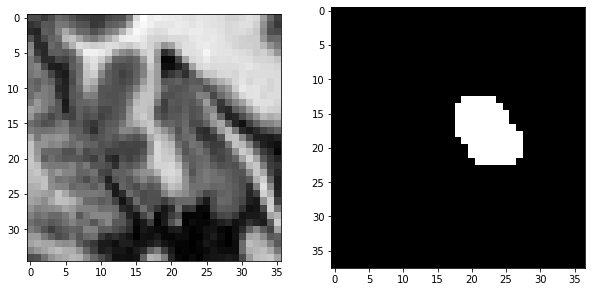

index: 20


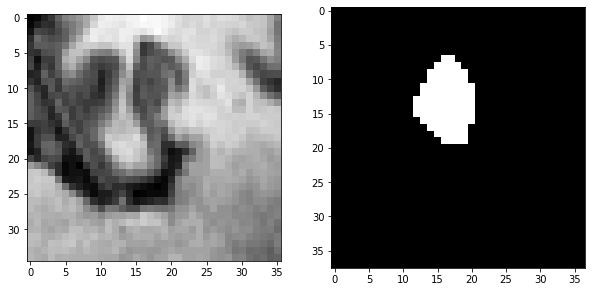

index: 30


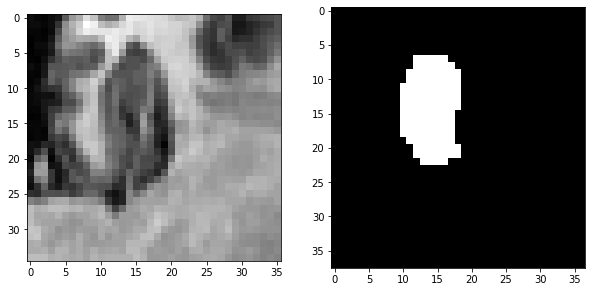

index: 40


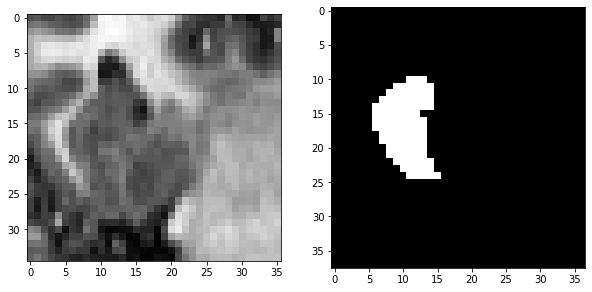

index: 50


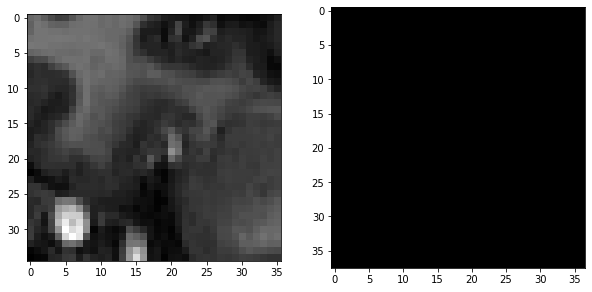

In [25]:
plotimage(image_np, label_np, 10)
plotimage(image_np, label_np, 20)
plotimage(image_np, label_np, 30)
plotimage(image_np, label_np, 40)
plotimage(image_np, label_np, 50)

## Looking at single image data

In [30]:
print(image.header_class)
print(label.header_class)

print(label.header)

<class 'nibabel.nifti1.Nifti1Header'>
<class 'nibabel.nifti1.Nifti1Header'>
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 38 51 37  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0


In [31]:
# 8 bits per pixel used
print(image.header['bitpix'])

8


In [32]:
# What are the units of measurement?
print(image.header.get_xyzt_units())

('mm', 'sec')


In [33]:
# Do we have a regular grid? What are grid spacings?
print(image.header['pixdim']) #yes, regular grid

[1. 1. 1. 1. 1. 0. 0. 0.]


In [34]:
# What dimensions represent axial, sagittal, and coronal slices? How do you know?
print(image_np.shape)
#sac
#sagittal, axial, coronal) = (0, 1, 2)

(35, 51, 36)


In [35]:
# volume (in mm³) of a hippocampus
print(np.count_nonzero(label_np)) #volume in mm^3

3420


## Plotting some charts

file: Images\hippocampus_280.nii.gz
[1118  136  133  131  130]


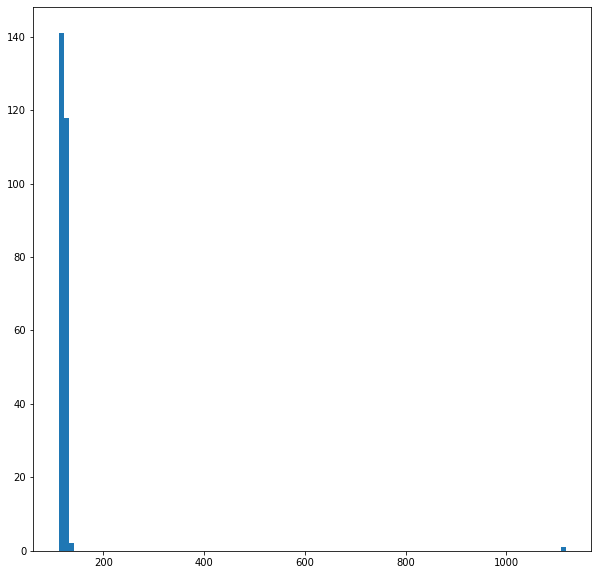

In [42]:
# Plot a histogram of all volumes that we have in the dataset
# the dataset measures against a slice of a normal population represented by the chart below.
label_volumes = []
for i in range(len(labels)):
    volume = nib.load(labels[i]).get_fdata().shape
    volume = sum(list(volume))
    label_volumes.append(volume)
    if volume > 500:
        print(f"file: {images[i].split('/')[-1]}")

x = plt.hist(label_volumes, bins = 100)

              
sorted_volumes = np.sort(label_volumes)
print(sorted_volumes[::-1][0:5])

<img src="img/nomogram_fem_right.svg" width=400 align=left>

file: Images\hippocampus_010.nii.gz
file: Images\hippocampus_281.nii.gz


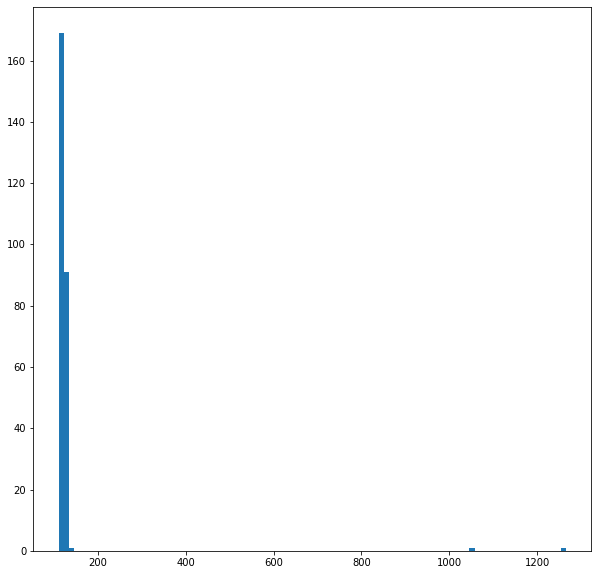

In [44]:
image_volumes = []
for i in range(len(images)):
    volumne = nib.load(images[i]).get_fdata().shape
    volumne = sum(list(volumne))
    image_volumes.append(volumne)
    if volumne > 500:
        print(f"file: {images[i].split('/')[-1]}")
              
x = plt.hist(image_volumes, bins=100)
# 2 outliers

In [55]:
# Copy the clean dataset to the output folder inside section1/out.
if not os.path.exists("out/images"):
    os.makedirs("out/images")
    
if not os.path.exists("out/labels"):
    os.makedirs("out/labels")

files = []
for l in labels:
    image_path = l.replace("labels", "images")

    label_volume = sum(list(nib.load(l).get_fdata().shape))
    image_volume = sum(list(nib.load(image_path).get_fdata().shape))  
    
    # remove all files where the label_volumne is higher than 5000
    # and remove all files where the image_volume is higher than 500
    # because everything above is an outlier
    if label_volume < 5000 and image_volume < 500:
        files.append(os.path.basename(l))
                
print("number of files:", len(files))

for file in files:
    shutil.copy("..\\data\\TrainingSet\\images\\"+file, "out\\images\\"+file)
    shutil.copy("..\\data\\TrainingSet\\labels\\"+file, "out\\labels\\"+file)

number of files: 260
